# ABEL collider tracking example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework and required classes

In [1]:
from abel import *
import numpy as np
import scipy.constants as SI
%load_ext autoreload
%autoreload 2

### Define electron linac (PWFA)

In [2]:
# define driver
driver_source = SourceBasic()
driver_source.charge = -2.7e10 * SI.e # [C]
driver_source.energy = 0.15e9 # [eV]
driver_source.rel_energy_spread = 0.01
driver_source.bunch_length = 42e-6 # [m]
driver_source.z_offset = 300e-6 # [m]
driver_source.emit_nx, driver_source.emit_ny = 10e-6, 10e-6 # [m rad]
driver_source.beta_x, driver_source.beta_y = 30e-3, 30e-3 # [m]
driver_source.num_particles = 5000
driver_source.wallplug_efficiency = 0.5

# define driver accelerator
driver_accel = RFAcceleratorBasic()
driver_accel.nom_energy_gain = 31.1e9 # [eV]
driver_accel.accel_gradient = 25e6 # [V/m]

# define driver complex
driver_complex = DriverComplexBasic()
driver_complex.source = driver_source
driver_complex.rf_accelerator = driver_accel

# define stage
stage = StageBasic()
stage.driver_source = driver_complex
stage.nom_energy_gain = 31.9e9 # [eV]
stage.length = 5 # [m]
stage.plasma_density = 7e21 # [m^-3]
stage.ramp_beta_mag = 5

# define first stage (half length)
first_stage = copy.deepcopy(stage)
first_stage.nom_energy_gain = stage.nom_energy_gain/2
first_stage.length = stage.length/2

# define beam
esource = SourceBasic()
esource.charge = -1e10 * SI.e # [C]
esource.energy = 5e9 # [eV]
esource.rel_energy_spread = 0.01
esource.bunch_length = 18e-6 # [m]
esource.z_offset = -34e-6 # [m]
esource.emit_nx, esource.emit_ny = 160e-6, 0.56e-6 # [m rad]
esource.beta_x = stage.matched_beta_function(esource.energy)
esource.beta_y = esource.beta_x
esource.num_particles = 1000
esource.wallplug_efficiency = 0.1
esource.accel_gradient = 25e6 # [V/m]

# define interstage
interstage = InterstageBasic()
interstage.beta0 = lambda E: stage.matched_beta_function(E)
interstage.dipole_length = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.dipole_field = 0.5 # [T]

# define electron BDS
ebds = BeamDeliverySystemBasic()
ebds.beta_x, ebds.beta_y = 3.3e-3, 0.1e-3 # [m]
ebds.bunch_length = 0.75 * ebds.beta_y

# define electron linac
elinac = PlasmaLinac()
elinac.driver_complex = driver_complex
elinac.source = esource
elinac.first_stage = first_stage
elinac.stage = stage
elinac.interstage = interstage
elinac.bds = ebds
elinac.num_stages = 16

### Define the positron linac (RF)

In [3]:
# define positron source
psource = SourceBasic()
psource.charge = 4e10 * SI.e # [C]
psource.energy = 2.86e9 # [eV]
psource.rel_energy_spread = 0.0015
psource.bunch_length = 75e-6 # [m]
psource.emit_nx, psource.emit_ny = 10e-6, 0.035e-6 # [m rad]
psource.beta_x = 3.3e-3 # [m]
psource.beta_y = 0.1e-3 # [m]
psource.num_particles = esource.num_particles
psource.wallplug_efficiency = 0.5
psource.accel_gradient = 25e6 # [V/m]

# define RF accelerator
paccel = RFAcceleratorBasic()
paccel.nom_energy_gain = 28.39e9 # [eV]
paccel.accel_gradient = 25e6 # [V/m]

# define positron BDS
pbds = BeamDeliverySystemBasic()
pbds.beta_x = psource.beta_x
pbds.beta_y = psource.beta_y

# define positron linac
plinac = ConventionalLinac()
plinac.source = psource
plinac.rf_accelerator = paccel
plinac.bds = pbds

### Define the IP and collider

In [4]:
# define interaction point
ip = InteractionPointGuineaPig()

# define collider (with two different linacs)
collider = Collider()
collider.linac1 = elinac
collider.linac2 = plinac
collider.ip = ip
collider.bunch_separation = 100e-9 # [s]
collider.num_bunches_in_train = 100
collider.rep_rate_trains = 100 # [Hz]

### Perform collider tracking

In [5]:
# track particles
collider.run('collider_example', num_shots=1, overwrite=True);

>> LINAC #1
Tracking element 1 (SourceBasic, stage 0, s = 200.0 m, 5.0 GeV, -1.60 nC, 1.0% rms, 162.6/0.6 µm-rad)
Tracking element 2 (StageBasic, stage 1, s = 202.5 m, 20.9 GeV, -1.60 nC, 0.2% rms, 162.8/0.6 µm-rad)
Tracking element 3 (InterstageBasic, stage 1, s = 209.4 m, 20.9 GeV, -1.60 nC, 0.2% rms, 162.8/0.6 µm-rad)
Tracking element 4 (StageBasic, stage 2, s = 214.4 m, 52.8 GeV, -1.60 nC, 0.1% rms, 162.9/0.6 µm-rad)
Tracking element 5 (InterstageBasic, stage 2, s = 225.4 m, 52.8 GeV, -1.60 nC, 0.1% rms, 162.9/0.6 µm-rad)
Tracking element 6 (StageBasic, stage 3, s = 230.4 m, 84.7 GeV, -1.60 nC, 0.1% rms, 162.9/0.6 µm-rad)
Tracking element 7 (InterstageBasic, stage 3, s = 244.4 m, 84.7 GeV, -1.60 nC, 0.1% rms, 162.9/0.6 µm-rad)
Tracking element 8 (StageBasic, stage 4, s = 249.4 m, 116.6 GeV, -1.60 nC, 0.0% rms, 162.9/0.6 µm-rad)
Tracking element 9 (InterstageBasic, stage 4, s = 265.7 m, 116.6 GeV, -1.60 nC, 0.0% rms, 162.9/0.6 µm-rad)
Tracking element 10 (StageBasic, stage 5, s = 27

In [6]:
collider.print_cost()
collider.linac2.wallplug_power()

-- COSTS ----------------------------------------
>> Construction costs:                 0.91 BILCU
   -- Linac #1:               492 MILCU
   -- Linac #2:               370 MILCU
   -- Interaction point:      50 MILCU
>> Overhead costs:                     0.47 BILCU
   -- Design/development:     91 MILCU
   -- Constrols/cabling:      137 MILCU
   -- Install/commission:     137 MILCU
   -- Management/inspection:  109 MILCU
>> Operating costs (0.2 TWh):          0.05 BILCU
>> Maintenance (91 FTEs, 15 yrs):      0.10 BILCU
>> Carbon tax (26 kton CO2e):         0.02 BILCU
   -- Construction (22 kton): 17 MILCU
   -- Operation (5 kton):   4 MILCU
-------------------------------------------------
>> Construction cost (EU accounting):  0.91 BILCU
>> Total project cost (US accounting): 1.39 BILCU
>> Full programme cost:                1.53 BILCU
>> Full programme cost (+ carbon tax): 1.55 BILCU
-------------------------------------------------


641147.8288191269

In [7]:
collider.print_emissions()

-- EMISSIONS ------------------------------------
>> Construction emissions (3.4 km): 22 kton CO2e
>> Operation emissions (0.2 TWh):   5 kton CO2e
-------------------------------------------------
>> Total emissions:                 26 kton CO2e
-------------------------------------------------


### Plot the wakefield structure

In [8]:
# plot wakefield
elinac.stage.plot_wake()

No wake calculated


### Plot the beam evolution in the linac

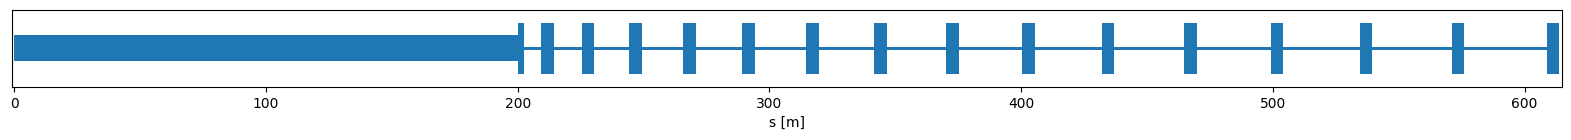

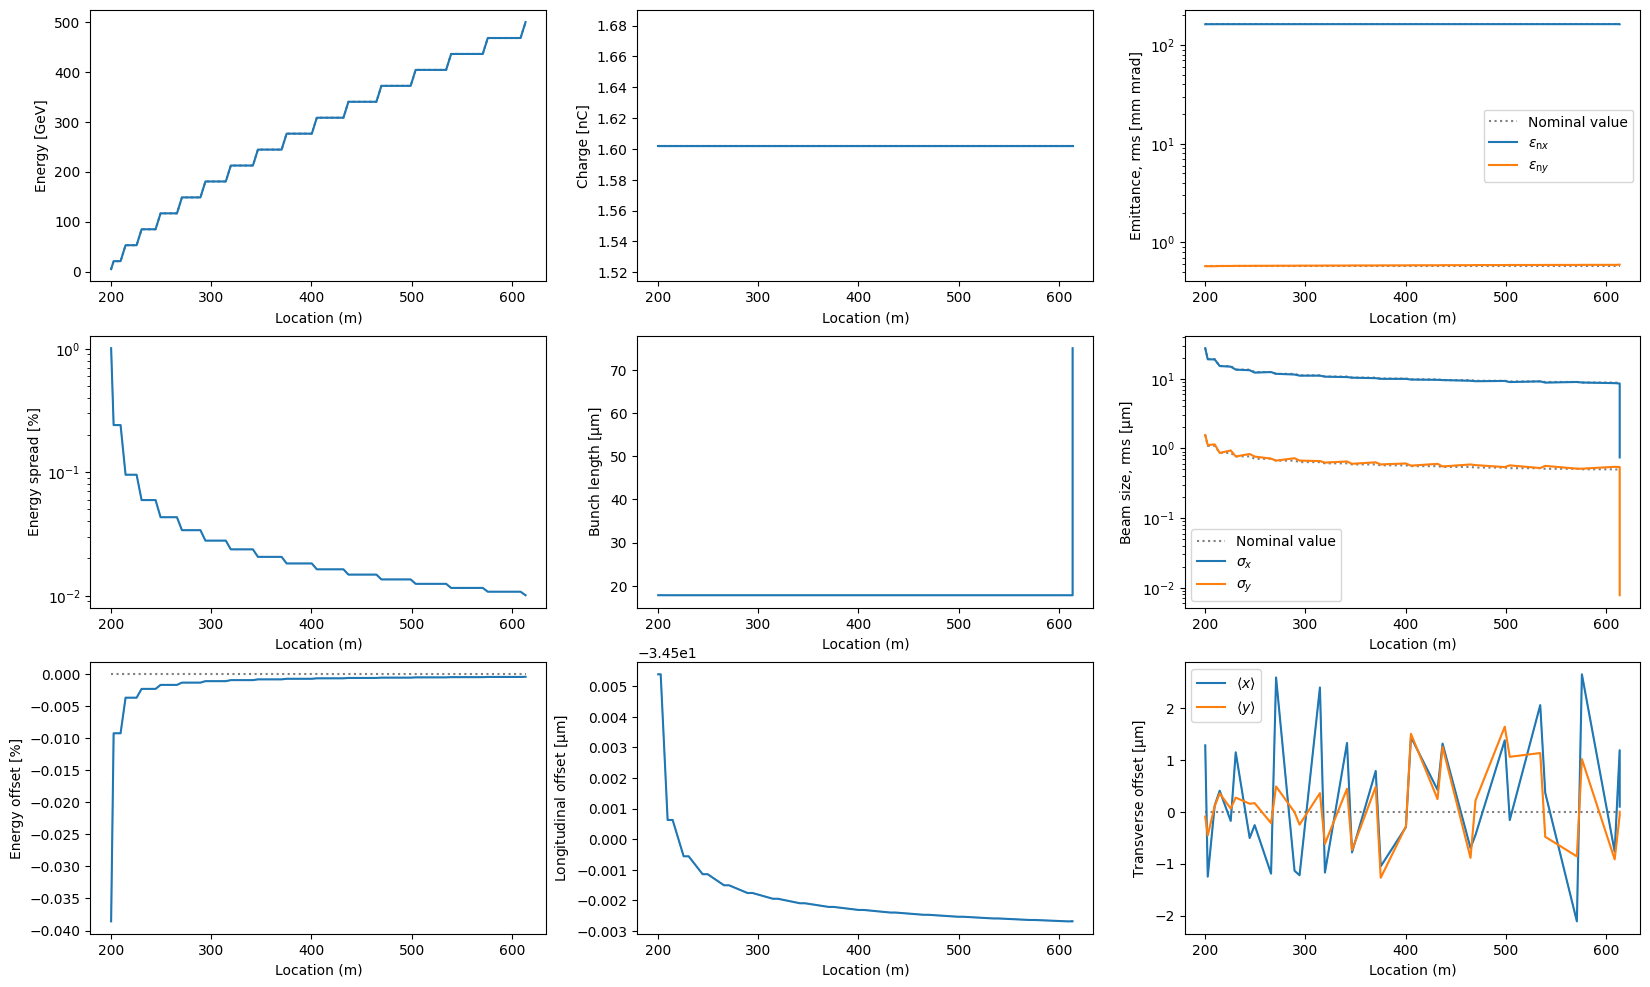

In [9]:
# plot beam evolution and linac survey
elinac.plot_survey()
elinac.plot_evolution(use_stage_nums=False)

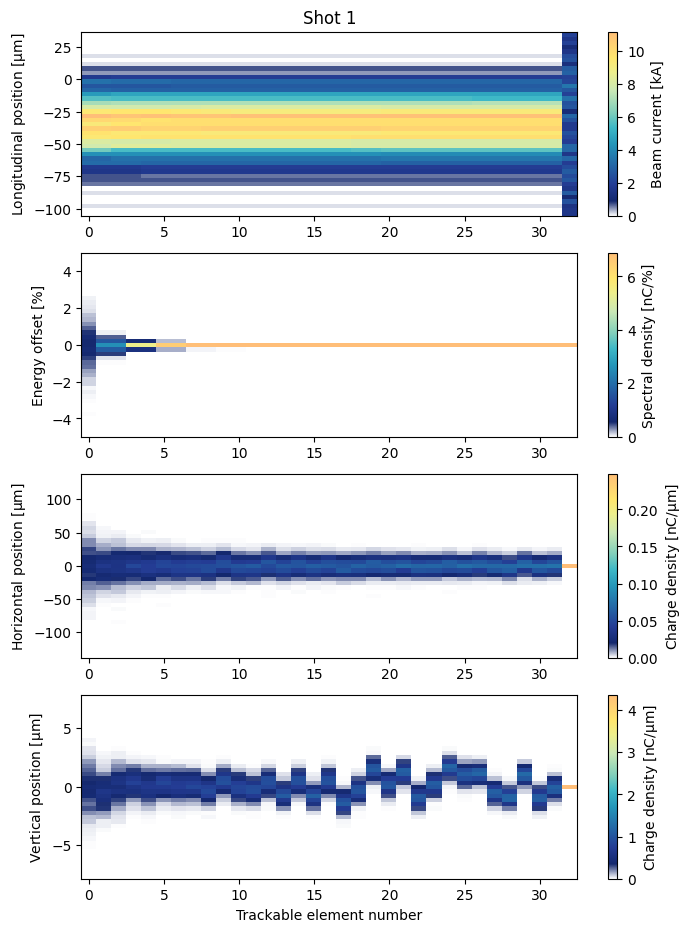

In [10]:
elinac.plot_waterfalls()

### Plot the collider luminosity

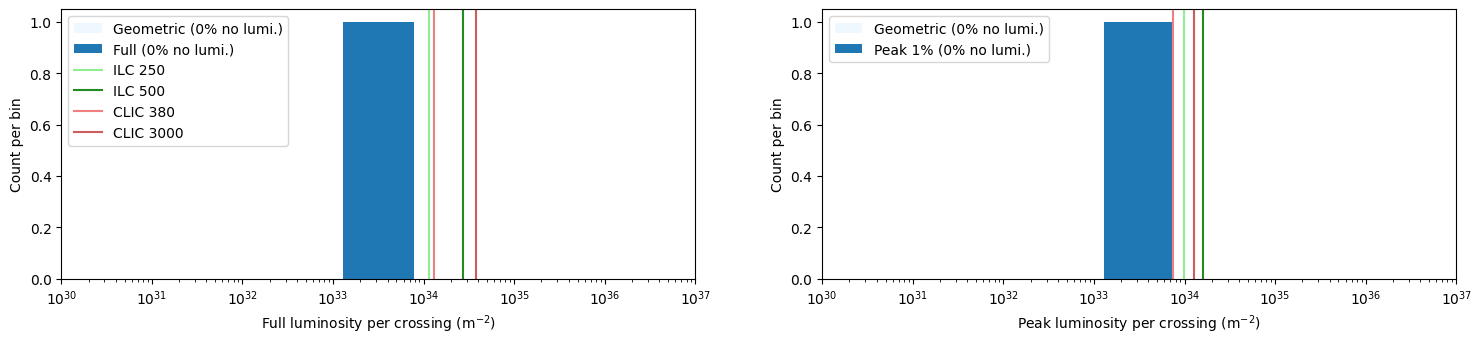

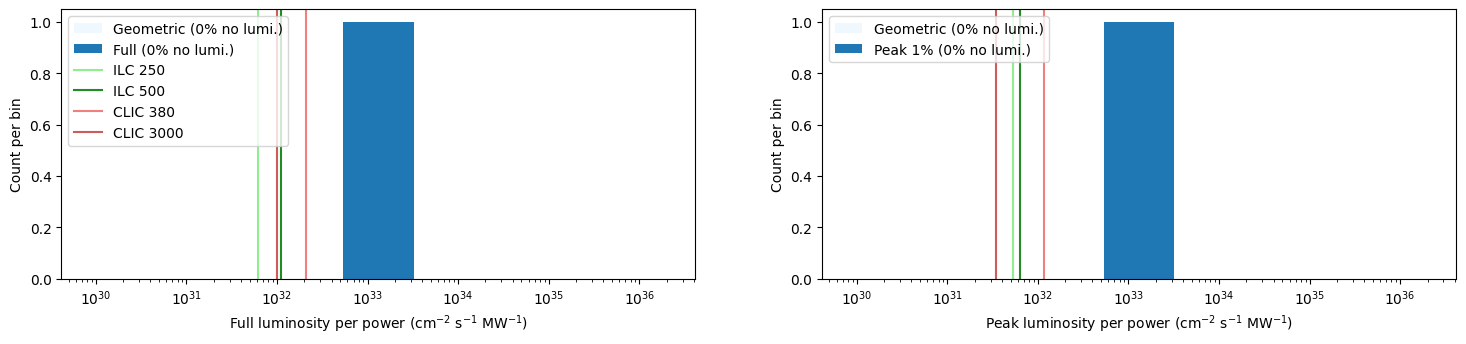

In [11]:
# plot luminosity
collider.plot_luminosity()

# plot luminosity per power
collider.plot_luminosity_per_power()